# 1

## a

$$
P = 
\begin{bmatrix} 
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4 \\
\end{bmatrix}
$$

## b

In [13]:
import numpy as np

np.random.seed(201)
transition = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])

def simulation(initial_state, num_steps):
    chain = [initial_state]
    current_state = initial_state
    for _ in range(num_steps):
        current_state = np.random.choice([1, 2, 3], p = transition[current_state - 1])
        chain.append(current_state)
    return chain

print("Simulated chain:", simulation(1, 10))

Simulated chain: [1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2]


# 2

## a

Suppose $\pi_\infty^T = (\pi_1, \pi_2, \pi_3)$
$$
\pi_\infty^T = \pi_\infty^TP
$$


\begin{cases}
\pi_1 = 0.2\pi_1 + 0.2\pi_2 + 0.2\pi_3 \\
\pi_2 = 0.7\pi_1 + 0.5\pi_2 + 0.4\pi_3 \\
\pi_3 = 0.1\pi_1 + 0.3\pi_2 + 0.4\pi_3 \\
\pi_1 + \pi_2 + \pi_3 = 1
\end{cases}


\begin{cases}
\pi_1 = \frac{1}{5} \\
\pi_2 = \frac{23}{45} \\
\pi_3 = \frac{13}{45}
\end{cases}

$$
\pi_\infty^T = \left(\frac{1}{5}, \frac{23}{45}, \frac{13}{45}\right)
$$

## b

The probability distribution with initial probability [0.1, 0.2, 0.7] at time i = 100: [0.2        0.51111111 0.28888889]
The probability distribution with initial probability [0.5, 0.3, 0.2] at time i = 100: [0.2        0.51111111 0.28888889]
The probability distribution with initial probability [0.3, 0.6, 0.1] at time i = 100: [0.2        0.51111111 0.28888889]


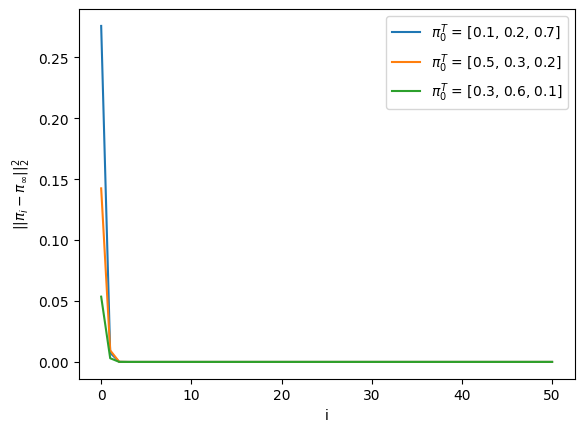

In [14]:
import matplotlib.pyplot as plt

limiting_pi = np.array([1/5, 23/45, 13/45])

def current_pi(pi0, num_steps):
    current_pi = pi0
    for _ in range(num_steps):
        current_pi = current_pi @ transition
    return current_pi

def norm_difference(pi0, num_steps):
    current_pi = pi0
    norm_diff = [np.sum((current_pi - limiting_pi)**2)]
    for _ in range(num_steps):
        current_pi = current_pi @ transition
        norm_diff.append(np.sum((current_pi - limiting_pi)**2))
    return norm_diff

pi0_1 = [0.1, 0.2, 0.7]
pi0_2 = [0.5, 0.3, 0.2]
pi0_3 = [0.3, 0.6, 0.1]

current_pi_1 = current_pi(pi0_1, 100)
current_pi_2 = current_pi(pi0_2, 100)
current_pi_3 = current_pi(pi0_3, 100)
print("The probability distribution with initial probability [0.1, 0.2, 0.7] at time i = 100:", 
      current_pi_1)
print("The probability distribution with initial probability [0.5, 0.3, 0.2] at time i = 100:", 
      current_pi_2)
print("The probability distribution with initial probability [0.3, 0.6, 0.1] at time i = 100:", 
      current_pi_3)

norm_diff1 = norm_difference(pi0_1, 50)
norm_diff2 = norm_difference(pi0_2, 50)
norm_diff3 = norm_difference(pi0_3, 50)
plt.plot(norm_diff1, label = r"$\pi_0^T$ = [0.1, 0.2, 0.7]")
plt.plot(norm_diff2, label = r"$\pi_0^T$ = [0.5, 0.3, 0.2]")
plt.plot(norm_diff3, label = r"$\pi_0^T$ = [0.3, 0.6, 0.1]")
plt.xlabel("i")
plt.ylabel(r"$||\pi_i - \pi_\infty||_2^2$")
plt.legend()
plt.show()

We can find that $\pi_i\to \pi_\infty$ and $||\pi_i - \pi_\infty||_2^2$ approaches 0 as i increases.

# 3

## a

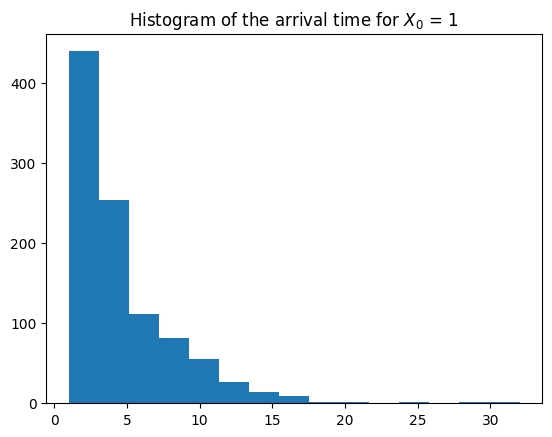

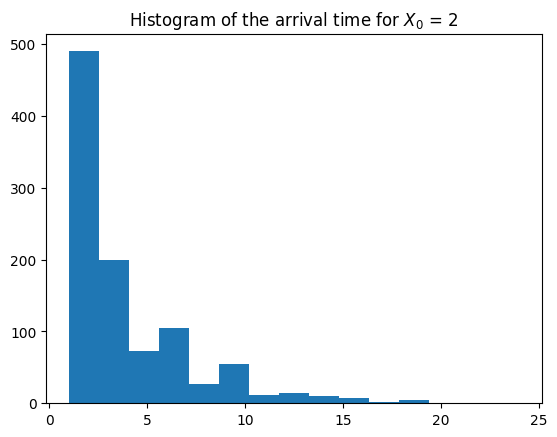

The mean arrival time for X0 = 1: 4.923
The mean arrival time for X0 = 2: 3.814


In [15]:
np.random.seed(201)

def arrival_time(initial_state, num_sim):
    time_list = []
    for _ in range(num_sim):
        time = 0
        current_state = initial_state
        while current_state != 3:
            current_state = np.random.choice([1, 2, 3], p = transition[current_state - 1])
            time = time + 1
        time_list.append(time)
    return time_list

time_list1 = arrival_time(1, 1000)
time_list2 = arrival_time(2, 1000)
plt.hist(time_list1, bins = 15)
plt.title(r"Histogram of the arrival time for $X_0$ = 1")
plt.show()
plt.hist(time_list2, bins = 15)
plt.title(r"Histogram of the arrival time for $X_0$ = 2")
plt.show()

print("The mean arrival time for X0 = 1:", np.mean(time_list1))
print("The mean arrival time for X0 = 2:", np.mean(time_list2))

## b

\begin{cases}
\mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2 + 0.1\mu_3 \\
\mu_2 = 1 + 0.2\mu_1 + 0.5\mu_2 + 0.3\mu_3 \\
\mu_3 = 0
\end{cases}


\begin{cases}
\mu_1 = \frac{60}{13} \\
\mu_2 = \frac{50}{13} \\
\mu_3 = 0
\end{cases}

We can find that the results in part (a) is close to the theoretical mean arrival time.